In [314]:
!pip install pandas seaborn plotly ydata_profiling folium sidetable

# IMPORTANDO AS BIBLIOTECAS

In [315]:
import datetime
import os
from pathlib import Path
from inspect import stack

import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport

# DEFININDO OPÇÕES GLOBAIS

In [316]:
pd.set_option('display.max_columns', None)

In [317]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [318]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# FUNÇÕES ÚTEIS

In [319]:
def get_files_directory(path_dir, specific_type=None):

    """

        FUNÇÃO PARA OBTER ARQUIVOS DE UM DIRETÓRIO.

        É POSSÍVEL ENVIAR UM FORMATO ESPECÍFICO PARA
        FILTRO DO FORMATO DE ARQUIVO DESEJADO.
        EX: OBTER APENAS XLSX

        # Arguments
            path_dir                   - Required : Diretório analisado (String)
            specific_type              - Optional : Lista com os formatos desejados (List)

        # Returns
            list_files                 - Required : Arquivos do diretório (List)

    """

    # INICIANDO A VARIÁVEL QUE ARMAZENARÁ TODOS OS ARQUIVOS DO DIRETÓRIO
    list_files = []

    # OBTENDO TODOS OS ARQUIVOS
    try:

        # VERIFICANDO SE É DIRETÓRIO
        if os.path.isdir(path_dir):

            # OBTENDO TODOS OS ARQUIVOS EXISTENTES NO ARQUIVO
            list_files = [os.path.join(path_dir, name) for name in os.listdir(path_dir)]

            # VERIFICANDO SE UMA EXTENSÃO ESPECÍFICA FOI DEFINIDA
            if specific_type:

              # VERIFICANDO SE A EXTENSÃO É DO TIPO TUPLE/LIST
              if not isinstance(specific_type, (tuple, list)):
                  specific_type = [specific_type]

              print("FILTRANDO PARA AS EXTENSÕES: {}".format(specific_type))

              # FILTRANDO OS VALORES DA LISTA
              list_files = [arq for arq in list_files if (Path(arq).suffix in (specific_type) or str(Path(arq).suffix).replace(".", "") in (specific_type))]

        else:
            list_files = [path_dir]

    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return list_files

In [320]:
def read_file(dir_name_file, csv_separator=","):

    """

      FUNÇÃO PARA LER UM ARQUIVO CSV OU EXCEL (XLS OU XLSX)
      COM OUTPUT EM FORMATO DATAFRAME

      # Arguments
          dir_name_file          - Required : Arquivo a ser lido
                                              (com o seu caminho fornecido) (Path | String)
          csv_separator          - Optional : Separador usado para caso de csv file (String)
      # Returns
          data                   - Required : Dados obtidos (DataFrame)


    """

    # INICIANDO A VARIÁVEL DE RETORNO
    data = pd.DataFrame()

    try:
      # VERIFICA SE É O ARQUIVO É CSV
      if dir_name_file.endswith('.csv'):
          data = pd.read_csv(dir_name_file, sep=csv_separator)

      # VERIFICA SE É O ARQUIVO É EXCEL
      elif dir_name_file.endswith(('.xls', '.xlsx')):
          data = pd.read_excel(dir_name_file)

      # PARA CASO NÃO CSV E NEM EXCEL, RETORNA NONE
      else:
          print("Formato de arquivo não suportado.")
          return None
    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return data

In [321]:
def get_data_ghcn():

  """

      OBTÉM OS DADOS DO GHCN

      # Arguments

      # Returns
          df          - Required: Dados do ghcn obtidos (DataFrame)

  """

  # INICIANDO O DATAFRAME
  df = pd.DataFrame()

  # PERCORRENDO TODOS OS ARQUIVOS QUE ESTÃO NO DIRETÓRIO
  for file in get_files_directory(data_dir,
                                  specific_type=specific_type):

    print("REALIZANDO A LEITURA - {}".format(file))

    if os.path.isfile(file):

      # REALIZANDO A LEITURA DO DATAFRAME AUXILIAR
      df_aux = read_file(file, csv_separator=",")

      # ADICIONANDO O RESULTAOD DA LEITURA AO DATAFRAME GLOBAL
      df = pd.concat([df, df_aux], ignore_index=True, axis=0)

  return df

# VARIÁVEIS GLOBAIS

In [322]:
# DIRETÓRIO ONDE ESTÃO OS DADOS
data_dir = 'data/DATASETS_GHCN_DAILY'

# FORMATO DESEJADO
specific_type = "csv"

In [323]:
# DATASET CONTENDO OS DADOS DAS ESTAÇÕES CLIMÁTICAS
dir_stations = 'data enrichment/DATA_STATIONS/data_station_with_result_api.xlsx'

In [324]:
# NOME DA COLUNA QUE CONTÉM AS INFORMAÇÕES DAS ESTAÇÕES CLIMÁTICAS
name_column_location = "name"

In [325]:
# LISTA DE COLUNAS PARA REMOVER DO DATASET
list_columns_to_drop = ["avg_snow_depth", "avg_min_temp", "avg_max_temp"]

# OBTENDO OS DADOS DO GHCN-DAILY

> Global Historical Climatology Network - Daily, Version 4
(NOAA GHCN v4)

In [326]:
df = get_data_ghcn()

FILTRANDO PARA AS EXTENSÕES: ['csv']
REALIZANDO A LEITURA - data/DATASETS_GHCN_DAILY/data_brazil_daily.csv


In [327]:
df.head()

,state,name,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_awnd,avg_prcp,avg_snow_depth
0,NaN,VAL DE CANS INTL,821930,1942,10,79.445161,72.151613,88.512903,45.156774,6.803226,NaN
1,NaN,VAL DE CANS INTL,821930,1942,11,80.116667,72.373333,89.940000,23.331000,8.116667,NaN
2,NaN,VAL DE CANS INTL,821930,1942,12,78.722581,72.529032,88.332258,67.735161,6.096774,NaN
3,NaN,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,7,83.751613,76.283871,89.893548,6.450968,10.000000,NaN
4,NaN,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,5,83.505000,76.020000,88.870000,34.996500,7.055000,NaN


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89844 entries, 0 to 89843
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           0 non-null      float64
 1   name            89844 non-null  object 
 2   station         89844 non-null  int64  
 3   year            89844 non-null  int64  
 4   month           89844 non-null  int64  
 5   avg_temp        89844 non-null  float64
 6   avg_min_temp    89844 non-null  float64
 7   avg_max_temp    89844 non-null  float64
 8   avg_awnd        89844 non-null  float64
 9   avg_prcp        88910 non-null  float64
 10  avg_snow_depth  29 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 7.5+ MB


In [329]:
df.describe()

,state,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_awnd,avg_prcp,avg_snow_depth
count,0.0,89844.000000,89844.000000,89844.000000,89844.000000,89844.000000,89844.000000,89844.000000,88910.000000,29.000000
mean,NaN,839500.329694,2004.375083,6.536786,75.619696,80.907593,90.610793,10.373911,15.642835,789.383485
std,NaN,17422.190996,17.362718,3.422755,7.067559,254.821433,140.629662,18.402767,71.650640,223.428202
min,NaN,749024.000000,1942.000000,1.000000,26.000000,16.828571,34.700000,0.000000,0.000000,387.922581
25%,NaN,825990.000000,1990.000000,4.000000,71.545161,63.033065,80.950000,0.000000,3.087097,567.406667
50%,NaN,836120.000000,2012.000000,7.000000,77.058065,68.987097,85.941935,0.088817,4.670000,900.183333
75%,NaN,839850.000000,2019.000000,9.000000,80.638710,73.442166,89.600000,13.333333,6.616129,965.489655
max,NaN,869980.000000,2023.000000,12.000000,101.600000,9999.900000,9999.900000,99.990000,968.038710,967.722581


## REMOVENDO COLUNAS NÃO DESEJADAS

In [330]:
# REALIZANDO UMA CÓPIA DO DATAFRAME ORIGINAL
df_original = df.copy()

In [331]:
df = df.drop(list_columns_to_drop, axis=1)

In [332]:
df.columns

Index(['state', 'name', 'station', 'year', 'month', 'avg_temp', 'avg_awnd', 'avg_prcp'], dtype='object')

In [333]:
df

,state,name,station,year,month,avg_temp,avg_awnd,avg_prcp
0,NaN,VAL DE CANS INTL,821930,1942,10,79.445161,45.156774,6.803226
1,NaN,VAL DE CANS INTL,821930,1942,11,80.116667,23.331000,8.116667
2,NaN,VAL DE CANS INTL,821930,1942,12,78.722581,67.735161,6.096774
3,NaN,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,7,83.751613,6.450968,10.000000
4,NaN,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,5,83.505000,34.996500,7.055000
...,...,...,...,...,...,...,...,...
89839,NaN,NOVA MARINGA,866630,2023,5,77.866667,0.000000,3.166667
89840,NaN,MARILIA,820305,2023,4,77.200000,0.000000,10.700000
89841,NaN,MARILIA,820305,2023,5,68.700000,0.000000,5.600000
89842,NaN,PARNAIBA PREFEITO DR JOAO SIL,822880,2023,6,83.800000,0.000000,NaN


# OBTENDO OS DADOS DE ESTAÇÕES METEOLÓGICAS

Esses dados são obtidos pela pipeline construida em:

https://github.com/emersonrafaels/tg_series_temporais_otimizacao_gerenciamento_energia/tree/main/src/data%20enrichment

In [334]:
# INICIANDO O DATAFRAME
df_station = read_file(dir_stations)

In [335]:
df_station.head()

,name,country,state,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year,information,city
0,ABROLHOS,BR,Bahia,-17.967,-38.700,38.0,19790112,20210920,1979,2021,"{'place_id': 307792151, 'licence': 'Data © Ope...",NaN
1,ABROLHOS,BR,Bahia,-17.967,-38.700,26.5,20160704,20201027,2016,2020,"{'place_id': 307792151, 'licence': 'Data © Ope...",NaN
2,ACARAU,BR,Ceará,-3.117,-40.083,77.5,20160704,20200220,2016,2020,"{'place_id': 177979907, 'licence': 'Data © Ope...",Bela Cruz
3,AFONSO PENA,BR,Paraná,-25.528,-49.176,910.7,19610101,20210920,1961,2021,"{'place_id': 234662604, 'licence': 'Data © Ope...",NaN
4,AGUA BOA,BR,Mato Grosso,-14.017,-52.217,433.5,20160704,20210727,2016,2021,"{'place_id': 279599105, 'licence': 'Data © Ope...",Água Boa


In [336]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                941 non-null    object 
 1   country             941 non-null    object 
 2   state               934 non-null    object 
 3   lat                 937 non-null    float64
 4   lon                 937 non-null    float64
 5   elev                937 non-null    float64
 6   begin_station       941 non-null    int64  
 7   end_station         941 non-null    int64  
 8   begin_station_year  941 non-null    int64  
 9   end_station_year    941 non-null    int64  
 10  information         935 non-null    object 
 11  city                540 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 88.3+ KB


In [337]:
df_station.describe()

,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year
count,937.000000,937.000000,937.000000,9.410000e+02,9.410000e+02,941.000000,941.000000
mean,-15.457863,-47.819308,378.277695,1.992879e+07,2.015986e+07,1992.817216,2015.904357
std,8.473399,7.393010,362.592961,2.914832e+05,1.403735e+05,29.135278,14.032386
min,-33.750000,-72.787000,-999.900000,1.931010e+07,1.931093e+07,1931.000000,1931.000000
25%,-22.333000,-52.233000,79.000000,1.974061e+07,2.020030e+07,1974.000000,2020.000000
50%,-15.900000,-47.617000,302.500000,2.010111e+07,2.021092e+07,2010.000000,2021.000000
75%,-8.283000,-42.317000,617.000000,2.016070e+07,2.021092e+07,2016.000000,2021.000000
max,3.867000,-29.317000,1811.500000,2.021082e+07,2.021092e+07,2021.000000,2021.000000


## ANALISANDO ALGUMAS AGÊNCIAS UNITARIAMENTE

In [338]:
df_station["name"].value_counts()

ITAITUBA              5
SANTA MARIA           4
BOGUS BRAZILIAN       4
MONTE DOURADO         3
PONTA PORA            3
                     ..
GUANAMBI              1
GUANHAES              1
GUARANTA DO NORTE     1
GUARAPUAVA            1
ZUMBI DOS PALMARES    1
Name: name, Length: 738, dtype: int64

In [339]:
df_station[df_station["name"] == "ITAITUBA"]

,name,country,state,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year,information,city
417,ITAITUBA,BR,Pará,-4.250,-56.000,34.0,19870629,19920930,1987,1992,"{'place_id': 195883441, 'licence': 'Data © Ope...",NaN
418,ITAITUBA,BR,Pará,-4.267,-55.983,45.0,19881103,20210920,1988,2021,"{'place_id': 362481648, 'licence': 'Data © Ope...",NaN
419,ITAITUBA,BR,Pará,-4.242,-56.001,33.5,19921001,20210920,1992,2021,"{'place_id': 287020362, 'licence': 'Data © Ope...",NaN
420,ITAITUBA,BR,Pará,-4.283,-56.000,14.5,20160704,20200915,2016,2020,"{'place_id': 195966988, 'licence': 'Data © Ope...",NaN
421,ITAITUBA,BR,Minas Gerais,-18.967,-49.517,561.0,20201217,20201217,2020,2020,"{'place_id': 364782761, 'licence': 'Data © Ope...",NaN


## ORDENANDO O DATASET PELA ORDEM DAS ESTAÇÕES DO ANO

In [340]:
df_station = df_station.sort_values(by=["name", "begin_station", "end_station"], ascending=True)

## REALIZANDO O JOIN DOS DADOS

Como precisamos obter a localização meterológica com cruzamento por estação e ano, realizamos usando uma função

In [341]:
def get_station_location(df, df_station,
                         column_lat="lat",
                         column_long="long",
                         column_elev="elev",
                         column_state="state",
                         column_city="city"):

  print("INICIANDO PROCESSO DE OBTENÇÃO DAS LOCALIZAÇÕES")

  # INICIANDO CONTADOR DE CRUZAMENTO OBTIDOS
  count_att_data = 0

  # CRIANDO AS COLUNAS DESEJADAS
  for column in [column_lat, column_long, column_elev, column_state, column_city]:
    # VERIFICANDO SE A COLUNA JÁ EXISTE
    if column not in df.columns:
      # CASO NÃO EXISTA, CRIA COM VALORES VÁZIOS
      df[column] = ""

  # PERCORRENDO O DATAFRAME
  for idx, row in df.iterrows():

    # FILTANDO ESTAÇÃO METEOLÓGICA DE BUSCA
    station = row[name_column_location]

    # OBTENDO O ANO DE BUSCA
    year = row["year"]

    try:
      # DO DATASET DE ESTAÇÕES, BUSCANDO A ESTAÇÃO PELO NOME E ANO
      # DEVE SER O PRIMEIRO ANO MAIOR OU IGUAL AO ANO BUSCADO
      df_filter = df_station[(df_station["name"] == station) & ((df_station["begin_station_year"] <= year) | (df_station["end_station_year"] >= year))]

      # VERIFICANDO SE ALGUM DADO FOI OBTIDO
      if not df_filter.empty:
        # OBTENDO LATITUDE, LONGITUDE E ELEVAÇÃO DA ESTAÇÃO METEOLÓGICA
        lat, lon, elev, state, city = df_filter.iloc[0][["lat", "lon", "elev", "state", "city"]]

        # ATUALIZANDO OS VALORES NO DATAFRAME ORIGINAL
        df.at[idx, column_lat] = lat
        df.at[idx, column_long] = lon
        df.at[idx, column_elev] = elev
        df.at[idx, column_state] = state
        df.at[idx, column_city] = city

        count_att_data +=1

    except Exception as ex:
        print(ex)

  print("PROCESSO CONCLUIDO COM SUCESSO")
  print("DADOS ATUALIZADOS PARA {} LINHAS".format(count_att_data))

  return df

In [342]:
df_join_ghcn_station = get_station_location(df=df, df_station=df_station)

INICIANDO PROCESSO DE OBTENÇÃO DAS LOCALIZAÇÕES
PROCESSO CONCLUIDO COM SUCESSO
DADOS ATUALIZADOS PARA 89844 LINHAS


## VISUALIZANDO O RESULTADO DO JOIN

In [343]:
df_join_ghcn_station.head()

,state,name,station,year,month,avg_temp,avg_awnd,avg_prcp,lat,long,elev,city
0,Pará,VAL DE CANS INTL,821930,1942,10,79.445161,45.156774,6.803226,-1.379,-48.476,16.5,NaN
1,Pará,VAL DE CANS INTL,821930,1942,11,80.116667,23.331000,8.116667,-1.379,-48.476,16.5,NaN
2,Pará,VAL DE CANS INTL,821930,1942,12,78.722581,67.735161,6.096774,-1.379,-48.476,16.5,NaN
3,Piauí,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,7,83.751613,6.450968,10.000000,-2.894,-41.732,4.9,NaN
4,Piauí,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,5,83.505000,34.996500,7.055000,-2.894,-41.732,4.9,NaN


In [344]:
df_station[df_station["name"] == "VAL DE CANS INTL"]

,name,country,state,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year,information,city
917,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,16.5,19421001,20210920,1942,2021,"{'place_id': 157815152, 'licence': 'Data © Ope...",NaN


In [345]:
df_join_ghcn_station[df_join_ghcn_station["name"] == "VAL DE CANS INTL"].head()

,state,name,station,year,month,avg_temp,avg_awnd,avg_prcp,lat,long,elev,city
0,Pará,VAL DE CANS INTL,821930,1942,10,79.445161,45.156774,6.803226,-1.379,-48.476,16.5,NaN
1,Pará,VAL DE CANS INTL,821930,1942,11,80.116667,23.331000,8.116667,-1.379,-48.476,16.5,NaN
2,Pará,VAL DE CANS INTL,821930,1942,12,78.722581,67.735161,6.096774,-1.379,-48.476,16.5,NaN
26,Pará,VAL DE CANS INTL,821930,1943,4,77.643333,99.990000,5.033333,-1.379,-48.476,16.5,NaN
27,Pará,VAL DE CANS INTL,821930,1943,3,76.974194,96.764516,4.683871,-1.379,-48.476,16.5,NaN


# CRIANDO COLUNA DATA - DATASET GHCN

In [346]:
df["measurement date"] = df.apply(lambda x: datetime.datetime(x["year"],
                                                              x["month"],
                                                              1),
                                  axis=1)

In [347]:
df

,state,name,station,year,month,avg_temp,avg_awnd,avg_prcp,lat,long,elev,city,measurement date
0,Pará,VAL DE CANS INTL,821930,1942,10,79.445161,45.156774,6.803226,-1.379,-48.476,16.5,NaN,1942-10-01
1,Pará,VAL DE CANS INTL,821930,1942,11,80.116667,23.331000,8.116667,-1.379,-48.476,16.5,NaN,1942-11-01
2,Pará,VAL DE CANS INTL,821930,1942,12,78.722581,67.735161,6.096774,-1.379,-48.476,16.5,NaN,1942-12-01
3,Piauí,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,7,83.751613,6.450968,10.000000,-2.894,-41.732,4.9,NaN,1943-07-01
4,Piauí,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,5,83.505000,34.996500,7.055000,-2.894,-41.732,4.9,NaN,1943-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89839,Mato Grosso,NOVA MARINGA,866630,2023,5,77.866667,0.000000,3.166667,-13.033,-57.1,354.5,NaN,2023-05-01
89840,São Paulo,MARILIA,820305,2023,4,77.200000,0.000000,10.700000,-22.197,-49.926,646.8,NaN,2023-04-01
89841,São Paulo,MARILIA,820305,2023,5,68.700000,0.000000,5.600000,-22.197,-49.926,646.8,NaN,2023-05-01
89842,Piauí,PARNAIBA PREFEITO DR JOAO SIL,822880,2023,6,83.800000,0.000000,NaN,-2.894,-41.732,4.9,NaN,2023-06-01


# CRIANDO UM SÉRIE TEMPORAL PARA CADA LOCALIDADE

In [348]:
# INICIANDO O DICT DE ESTAÇÕES
dict_dataset_stations = {}
dataset_stations = pd.DataFrame()

# PERCORRENDO CADA UMA DAS ESTAÇÕES
for station in df["name"].unique():

  # FILTRANDO A ESTAÇÃO METEOLÓGICA
  df_station_filter = df[df["name"] == station]

  # DEFININDO A DATA COMO INDEX
  df_station_filter = df_station_filter.set_index('measurement date')

  # ORDENANDO DE FORMA ASCENDENTE OS DADOS PELO INDEX
  df_station_filter = df_station_filter.sort_index(ascending=True)

  # DEFININDO A FREQUÊNCIA COMO MENSAL
  df_station_filter_monthly = df_station_filter.resample("M").first()

  # PREENCHENDO OS VALORES NULOS COM O ÚLTIMO VALOR PREENCHIDO
  df_station_filter_monthly = df_station_filter_monthly.fillna(method='ffill')

  # SALVANDO NO DICT
  dict_dataset_stations[station] = df_station_filter_monthly

  # REALIZANDO O APPEND NO DATAFRAME
  dataset_stations = pd.concat([dataset_stations, df_station_filter_monthly], axis=0)

# ANÁLISE EXPLORATÓRIA

## PROFILING DO DATASET

### DATASET GHCN

In [349]:
type_schema = {"name": "categorical",
               "state": "categorical",
               "city": "categorical"}

In [350]:
profile = ProfileReport(df,
                        title="Profiling - GHCN - DAILY",
                        type_schema=type_schema,
                        minimal=True)

In [351]:
profile.to_file("profilings/profiling_ghcn_daily.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### ANALISANDO VALORES FALTANTES

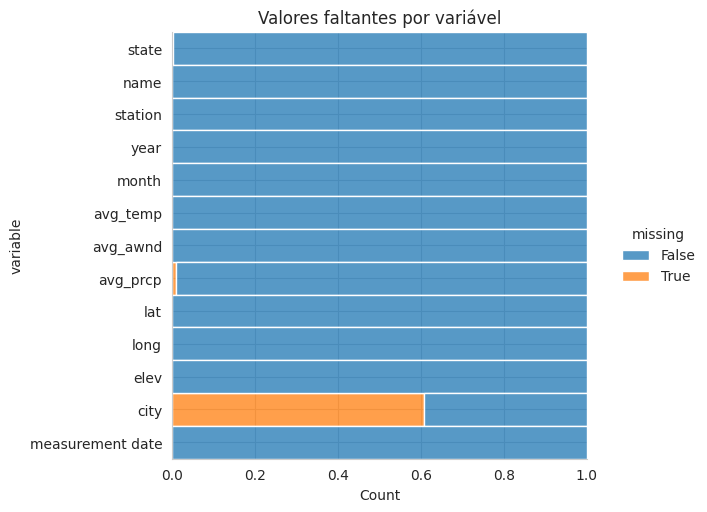

In [352]:
sns.set_style("whitegrid")

p = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Valores faltantes por variável')
plt.show()
p.savefig("data/DATASETS_GHCN_DAILY/plot_ghcn_daily_missing_values.png")

In [353]:
df.stb.missing()

,missing,total,percent
city,54627,89844,60.802057
avg_prcp,934,89844,1.039580
state,184,89844,0.204799
name,0,89844,0.000000
station,0,89844,0.000000
year,0,89844,0.000000
month,0,89844,0.000000
avg_temp,0,89844,0.000000
avg_awnd,0,89844,0.000000
lat,0,89844,0.000000


#### QUANTIDADE DE ESTAÇÕES DISTINTAS

In [354]:
count_state = df[name_column_location].nunique()
count_state

652

### DATASET GHCN - AGRUPADO COM FREQUÊNCIA MENSAL

In [355]:
type_schema = {"name": "categorical",
               "state": "categorical",
               "city": "categorical"}

In [356]:
profile = ProfileReport(dataset_stations.reset_index(),
                        title="Profiling - GHCN - GROUP FREQ MONTH",
                        type_schema=type_schema,
                        minimal=True)

In [357]:
profile.to_file("profilings/profiling_ghcn_daily_group_freq_month.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### ANALISANDO VALORES FALTANTES

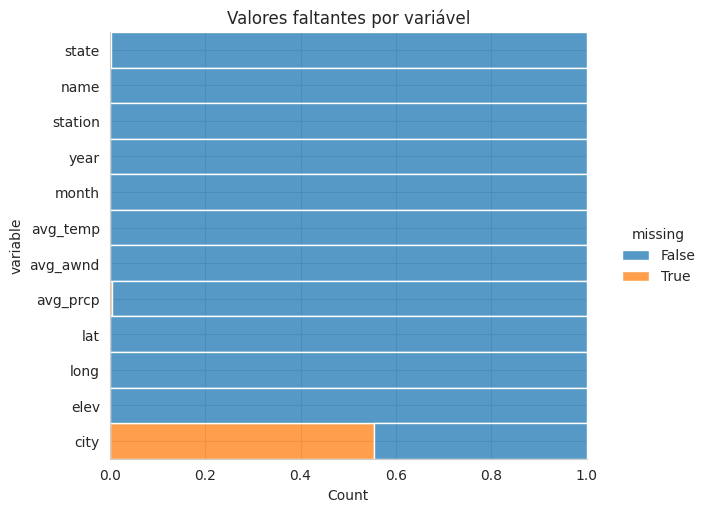

In [358]:
sns.set_style("whitegrid")

p = sns.displot(
    data=dataset_stations.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Valores faltantes por variável')
plt.show()
p.savefig("data/DATASETS_GHCN_DAILY/plot_ghcn_daily_group_freq_month_missing_values.png")

In [359]:
dataset_stations.stb.missing()

,missing,total,percent
city,87819,158406,55.439188
avg_prcp,925,158406,0.583943
state,569,158406,0.359204
name,0,158406,0.000000
station,0,158406,0.000000
year,0,158406,0.000000
month,0,158406,0.000000
avg_temp,0,158406,0.000000
avg_awnd,0,158406,0.000000
lat,0,158406,0.000000


#### QUANTIDADE DE ESTAÇÕES DISTINTAS

In [360]:
count_state = dataset_stations[name_column_location].nunique()
count_state

652

# EXPORTANDO DADOS

## DATASET CONTENDO O DATASET COM FREQUÊNCIA MENSAL

In [361]:
dataset_stations.to_excel("data/RESULTS/dataset_ghcn_group_freq_month.xlsx")